#*WALMART SALES PREDICTION*

In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#uploading dataset and checking its attributes
walmart_df=pd.read_csv('Walmart_Store_sales.csv')
walmart_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
#to check the volume of data
walmart_df.shape

(6435, 8)

In [4]:
#using info function to check for null values in dataset
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


*Conclusion:1) No null values/missing values
            2) There are no categorical values, so there is no need of encoding 
            3) There is datatime data present so we need to convert it to datatime datatype*

In [5]:
#coverting the Date column data to datatime datatype inorder to pandas functions on the data
walmart_df['Date']=pd.to_datetime(walmart_df['Date']) #to_datetime is used to covert the data to datetime format
print(walmart_df.head()) #to check converted format
print(walmart_df.info()) #to confirm the datatype

   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-05-02    1643690.90             0        42.31       2.572   
1      1 2010-12-02    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-05-03    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Ho

<AxesSubplot:>

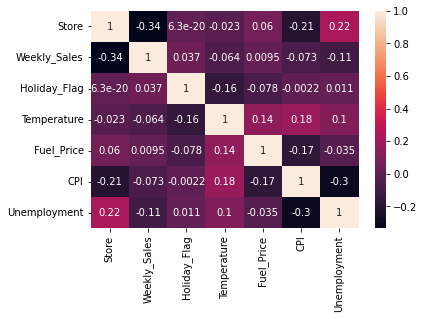

In [6]:
#To check for correlation between data attributes
sns.heatmap(walmart_df.corr(),annot=True)

*#from this we can infer that Fuel_price has very minimal impact on my weekly sales, so we can drop that column from analysis if we want to*

In [7]:
#Hypothesis Testing between CPI and Sales
from scipy import stats
coeff,p_val_CPI=stats.pearsonr(walmart_df['Weekly_Sales'],walmart_df['CPI'])
if p_val_CPI<0.05:
    print('Accept Alternate Hypothesis----> CPI will impact Weekly_sales')
else:
    print('Accept Null Hypothesis----> CPI has no impact Weekly_sales')
          

Accept Alternate Hypothesis----> CPI will impact Weekly_sales


In [8]:
#Hypothesis Testing between Unemployment and Sales
from scipy import stats
coeff,p_val_Unemployment=stats.pearsonr(walmart_df['Weekly_Sales'],walmart_df['Unemployment'])
if p_val_Unemployment<0.05:
    print('Accept Alternate Hypothesis----> Unemployment will impact Weekly_sales')
else:
    print('Accept Null Hypothesis----> Unemployment has no impact Weekly_sales')

Accept Alternate Hypothesis----> Unemployment will impact Weekly_sales


In [9]:
#Hypothesis Testing between Fuel_Price and Sales
from scipy import stats
coeff,p_val_Fuel_Price=stats.pearsonr(walmart_df['Weekly_Sales'],walmart_df['Fuel_Price'])
if p_val_Fuel_Price<0.05:
    print('Accept Alternate Hypothesis----> Fuel_Price will impact Weekly_sales')
else:
    print('Accept Null Hypothesis----> Fuel_Price has no impact Weekly_sales')

Accept Null Hypothesis----> Fuel_Price has no impact Weekly_sales


*#From the above three hypothesis testing we can infer that CPI and Unemployment column data will affect the weekly sales
#But contrary to this Fuel_Price has no impact on Weekly_sales so i dont need to use this column data while building a model* 

In [10]:
#Dropping the Fuel_Price column
walmart_df.drop('Fuel_Price',axis=1,inplace=True)
walmart_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,211.350143,8.106


In [11]:
#Exploring the types and count of categorical Data
print(walmart_df['Holiday_Flag'].value_counts())
print(walmart_df['Store'].value_counts())

0    5985
1     450
Name: Holiday_Flag, dtype: int64
43    143
41    143
33    143
29    143
25    143
21    143
17    143
13    143
9     143
5     143
1     143
44    143
40    143
36    143
32    143
28    143
24    143
20    143
16    143
12    143
8     143
37    143
45    143
39    143
2     143
35    143
31    143
27    143
23    143
19    143
15    143
11    143
7     143
3     143
42    143
38    143
34    143
30    143
26    143
22    143
18    143
14    143
10    143
6     143
4     143
Name: Store, dtype: int64


In [12]:
#Finding_out_which_store_has_Maximum_sales
store_Total_sales=walmart_df.groupby('Store')['Weekly_Sales'].sum() #Calculating the total sales of each store in the given data
print('Store with Maximum Sales is---->Store Number:',store_Total_sales.argmax()+1) #getting the position of maximum sales when compared to all the stores, this postion is nothing but the store number with the maximum sale 

Store with Maximum Sales is---->Store Number: 20


*#In the above case we can use both average sale value as well as total sale value to get the maximum sales but i preferred total sale value because i wanted to check the overall value sales of all the stores over the given time frame and select the store with maximum sale.From this we can infer that Store 20 had the highest sale out of all the stores.*

In [13]:
#Which_Store_has_the_Maximum_Standard_Deviation
store_sales_Std_Deviation=walmart_df.groupby('Store')['Weekly_Sales'].std() #Calculating the STD_Deviation of each store in the given data
print('Store with Maximum Standard Deviation is---->Store Number:',store_sales_Std_Deviation.argmax()+1) # getting the position of maximum value to infer the store with maximum std deviation
Sales_of_Store_14=walmart_df[walmart_df['Store']==14]    #Seperating the store 14 data which has the maximum standard deviation in sales
Store_14_avg_sales=Sales_of_Store_14['Weekly_Sales'].mean()
Store_14_std_sales=Sales_of_Store_14['Weekly_Sales'].std()
Coefficient_of_Variation=Store_14_std_sales/Store_14_avg_sales
print('Coefficient of variation in the sales of store 14 ----->',Coefficient_of_Variation)

Store with Maximum Standard Deviation is---->Store Number: 14
Coefficient of variation in the sales of store 14 -----> 0.15713673600948339


*#From this we can infer that the Store 14 has the maximum Standard Deviation in terms of sales which means that the sales in store 14 are hihgly unpredictable and are varying a lot. This could be due to variety of reasons but main point is that the sales in store 14 is higly inconsistent when compared to others. And Also Coefficient of variation gives us the degree of variation from value to other value.*

In [14]:
#Finding out the time frame in which this data was collected
print('Highest date in the dataset--->',walmart_df['Date'].max())
print('Lowest date in the dataset--->',walmart_df['Date'].min())

Highest date in the dataset---> 2012-12-10 00:00:00
Lowest date in the dataset---> 2010-01-10 00:00:00


#Which Store has good Quarterly Growth Rate in Q3 2012
Q3_2012_Sales=walmart_df[(walmart_df['Date']>=pd.to_datetime('2012-07-01'))&(walmart_df['Date']<=pd.to_datetime('2012-09-30'))]
#copy_df=walmart_df.copy()
#copy_df.set_index('Date',inplace=True) #I have set the index of my DF to Date, so that i can index and gather data for quarters easily
#Q3_2012_Sales=copy_df.loc['2012-07':'2012-09'] #I have seperated my Q3 2021 Data from whle dataframe
print(Q3_2012_Sales['Date'].max())
print(Q3_2012_Sales['Date'].min())
dict={}
for i in Q3_2012_Sales['Store'].unique():
    Current_Value=Q3_2012_Sales[(Q3_2012_Sales['Date']==pd.to_datetime('2012-09-28'))&(Q3_2012_Sales['Store']==i)]['Weekly_Sales'].mean()
    past_Value=Q3_2012_Sales[(Q3_2012_Sales['Date']==pd.to_datetime('2012-07-09'))&(Q3_2012_Sales['Store']==i)]['Weekly_Sales'].mean()
    Growth_rate=((Current_Value-past_Value)/past_Value)*100
    dict[i]=Growth_rate
all_values=dict.values()
max_value=idxmax
max_value

#Which Store has good Quarterly Growth Rate in Q3 2012
Q3_2012_Sales=walmart_df[(walmart_df['Date']>=pd.to_datetime('2012-07-01'))&(walmart_df['Date']<=pd.to_datetime('2012-09-30'))] #Seperating the data for Q3 alone from whole data set
Sorted_df = Q3_2012_Sales.sort_values(by=["Store", "Date"])#Sorting out the seperated dataframe so that i would be useful for calculating growth rate
print(Sorted_df)
Growth_rate=Sorted_df.groupby("Store")['Weekly_Sales'].pct_change() #using lambda function to return the growth
Growth_rate
#print('Store with Maximum Growth Rate is---->Store Number:',Growth_rate.idxmax())

walmart_df['Quarter'] = walmart_df['Date'].dt.quarter
walmart_df[walmart_df['Date']>=pd.to_datetime('2012-01-01')].groupby(['Quarter','Store'])['Weekly_Sales'].pct_change()

In [15]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   CPI           6435 non-null   float64       
 6   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 352.0 KB


In [16]:
Day_of_week=walmart_df['Date']
Day_of_week.dt.dayofweek
Day_of_week.dt.day_name()

0         Sunday
1       Thursday
2         Friday
3         Friday
4         Monday
          ...   
6430      Friday
6431    Thursday
6432      Monday
6433      Friday
6434      Friday
Name: Date, Length: 6435, dtype: object

In [17]:
#Storing Dataframe in variables for Building an ML model
x=walmart_df.drop('Weekly_Sales',axis=1)
y=walmart_df['Weekly_Sales']
print(x)
print(y)

      Store       Date  Holiday_Flag  Temperature         CPI  Unemployment
0         1 2010-05-02             0        42.31  211.096358         8.106
1         1 2010-12-02             1        38.51  211.242170         8.106
2         1 2010-02-19             0        39.93  211.289143         8.106
3         1 2010-02-26             0        46.63  211.319643         8.106
4         1 2010-05-03             0        46.50  211.350143         8.106
...     ...        ...           ...          ...         ...           ...
6430     45 2012-09-28             0        64.88  192.013558         8.684
6431     45 2012-05-10             0        64.89  192.170412         8.667
6432     45 2012-12-10             0        54.47  192.327265         8.667
6433     45 2012-10-19             0        56.47  192.330854         8.667
6434     45 2012-10-26             0        58.85  192.308899         8.667

[6435 rows x 6 columns]
0       1643690.90
1       1641957.44
2       1611968.17
3     

In [18]:
#splitting the data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=10)
print(x_test.head())
print(x_train.head())
print(y_test.head())
print(y_train.head())

      Store       Date  Holiday_Flag  Temperature         CPI  Unemployment
890       7 2010-09-17             0        48.56  190.468829         9.017
2125     15 2012-06-15             0        67.70  138.129533         8.150
686       5 2012-04-13             0        70.56  222.097111         5.801
3089     22 2011-09-30             0        69.78  140.381000         8.023
2661     19 2011-07-10             0        53.10  136.472000         7.866
      Store       Date  Holiday_Flag  Temperature         CPI  Unemployment
3042     22 2010-05-11             0        44.34  136.786226         8.572
5329     38 2010-10-29             0        61.09  126.436419        14.313
5524     39 2011-10-28             0        71.05  216.405131         7.716
1316     10 2010-08-27             0        84.99  126.089290         9.199
1463     11 2010-09-24             0        77.36  214.908452         7.346
890      489408.53
2125     636737.65
686      351832.03
3089     953314.16
2661    1461